In [1]:
import numpy as np 
import pandas as pd

In [2]:
train=pd.read_csv("D:\Downloads/Train_eP48B9k.csv")
test=pd.read_csv("D:\Downloads/Test_jPKyvmK.csv")

In [31]:
train.head()


,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


In [5]:
ID_COL, TARGET_COL = 'id', 'term_deposit_subscribed'

In [6]:
print(f'\nTrain contains {train.shape[0]} samples and {train.shape[1]} variables')
print(f'\nTest contains {test.shape[0]} samples and {test.shape[1]} variables')

features = [c for c in train.columns if c not in [ID_COL, TARGET_COL]]
print(f'\nThe dataset contains {len(features)} features')


Train contains 31647 samples and 18 variables

Test contains 13564 samples and 17 variables

The dataset contains 16 features


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import seaborn as sns

Text(0.5, 1.0, 'Target_Distribution')

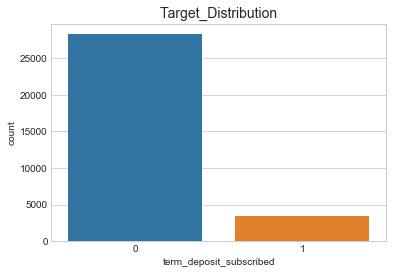

In [8]:
sns.countplot(train[TARGET_COL])
plt.title('Target_Distribution',fontsize=14)

In [9]:
train[TARGET_COL].value_counts()

0    28253
1     3394
Name: term_deposit_subscribed, dtype: int64

In [10]:
null_values_per_variable = 100 * (train.isnull().sum()/train.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

days_since_prev_campaign_contact    81.6
customer_age                         2.0
balance                              1.3
last_contact_duration                1.0
personal_loan                        0.5
marital                              0.5
num_contacts_in_campaign             0.4
job_type                             0.0
education                            0.0
default                              0.0
term_deposit_subscribed              0.0
housing_loan                         0.0
prev_campaign_outcome                0.0
communication_type                   0.0
day_of_month                         0.0
month                                0.0
num_contacts_prev_campaign           0.0
id                                   0.0
dtype: float64

In [14]:
train.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome',
       'term_deposit_subscribed'],
      dtype='object')

In [16]:
train.dtypes

id                                   object
customer_age                        float64
job_type                             object
marital                              object
education                            object
default                              object
balance                             float64
housing_loan                         object
personal_loan                        object
communication_type                   object
day_of_month                          int64
month                                object
last_contact_duration               float64
num_contacts_in_campaign            float64
days_since_prev_campaign_contact    float64
num_contacts_prev_campaign            int64
prev_campaign_outcome                object
term_deposit_subscribed               int64
dtype: object

In [22]:
#cat_cols1= train.select_dtypes(include=['object'])
#print(cat_cols.columns)

In [23]:
cat_cols = ['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome']

In [24]:
num_cols=[c for c in features if c not in cat_cols]

In [25]:
num_cols

['customer_age',
 'balance',
 'day_of_month',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'days_since_prev_campaign_contact',
 'num_contacts_prev_campaign']

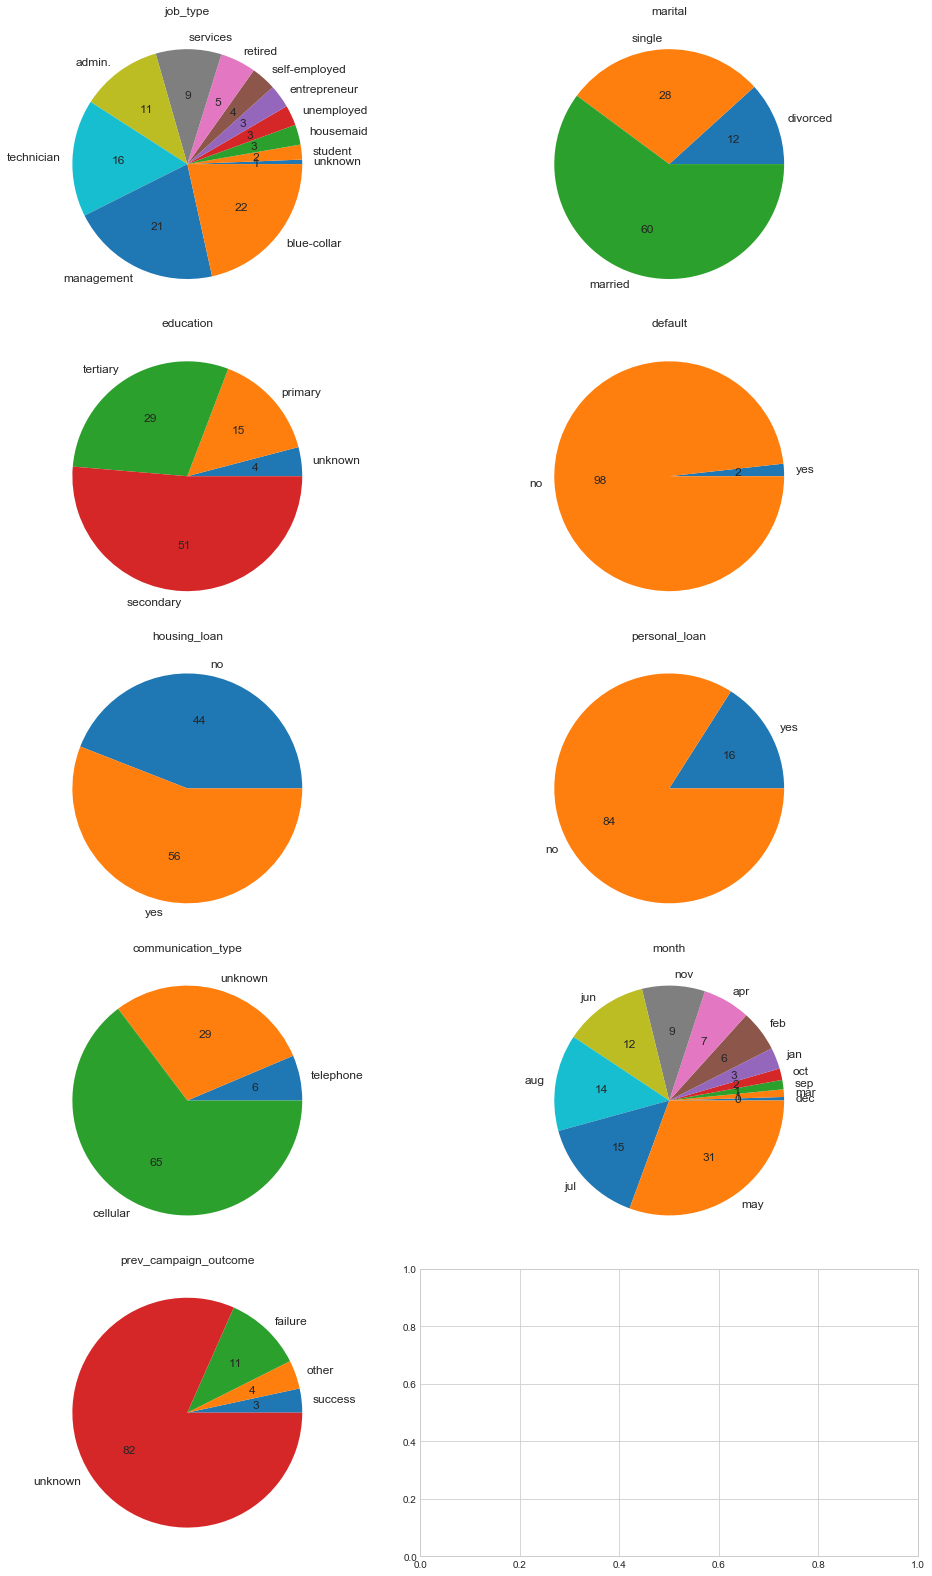

In [28]:
fig, axes = plt.subplots(5, 2, figsize=(14, 22))
axes = [ax for axes_row in axes for ax in axes_row]
for i,c in enumerate (train[cat_cols]):
    _=train[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=12)
    _ = axes[i].set_ylabel('')
_ = plt.tight_layout()    

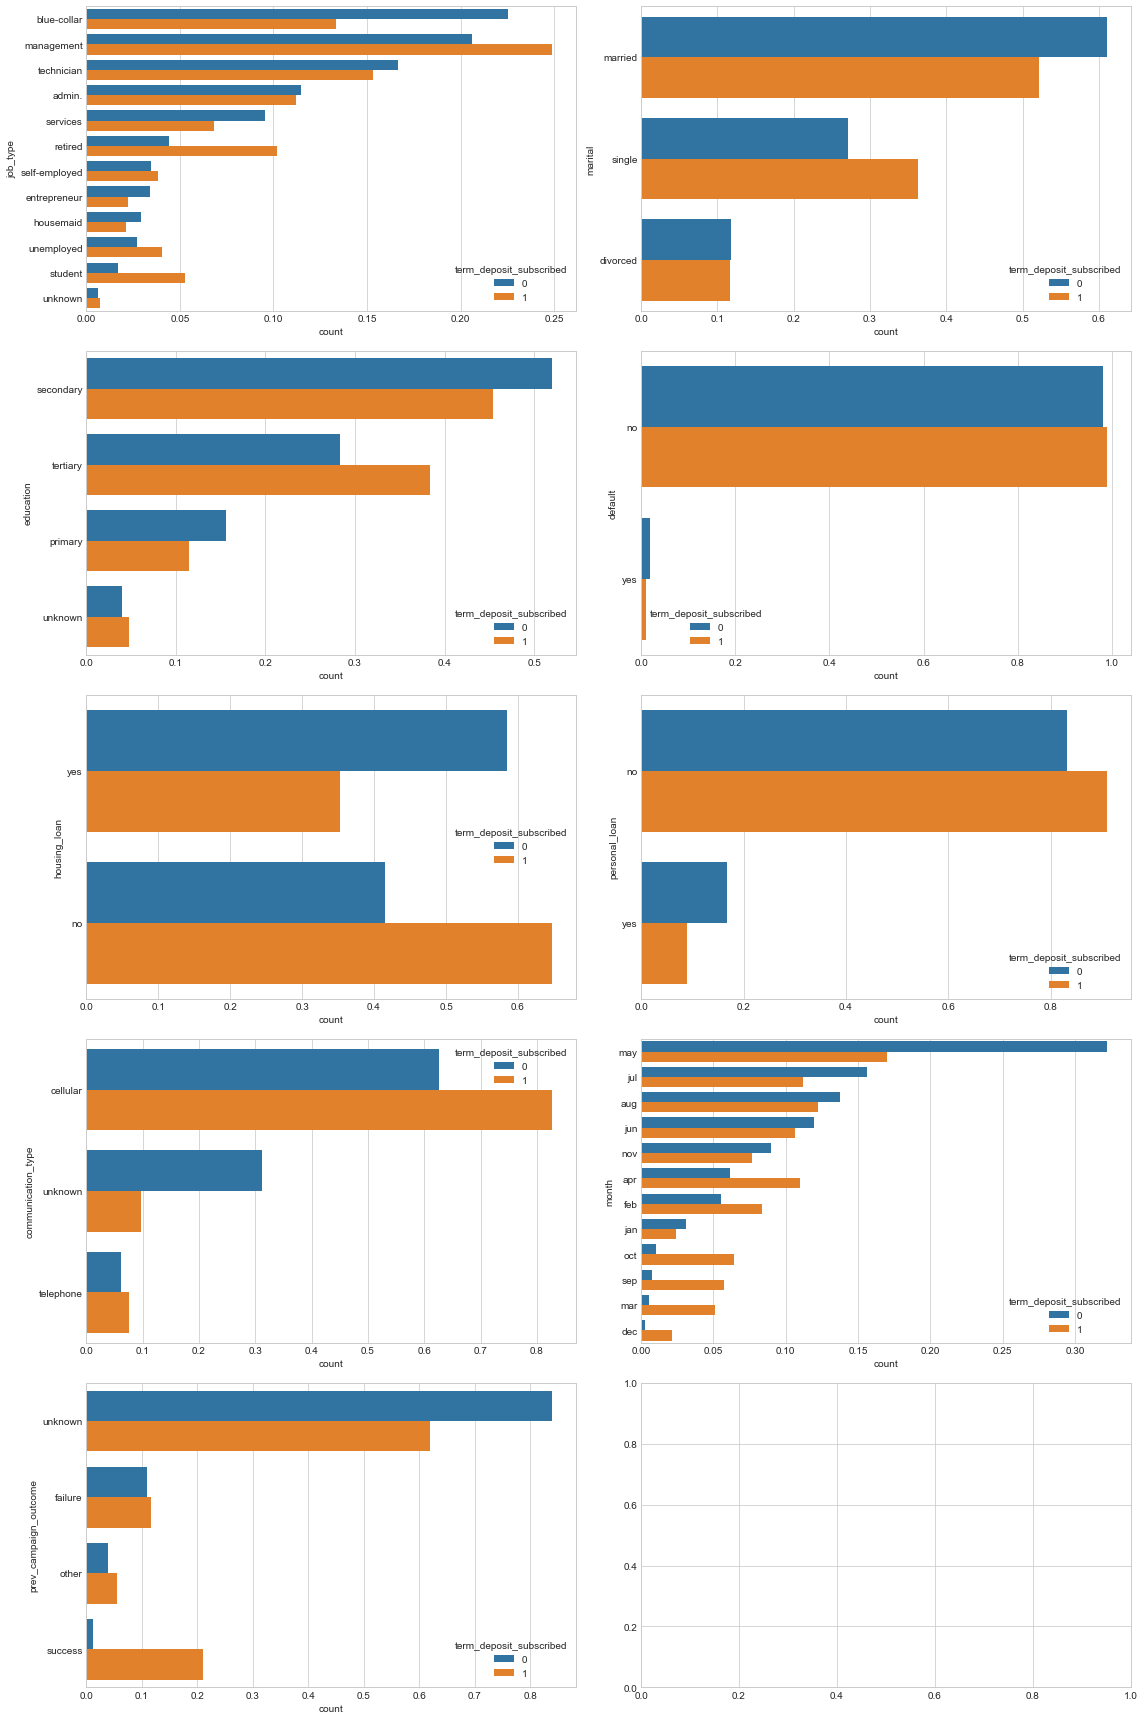

In [29]:
fig, axes = plt.subplots(5, 2, figsize=(16, 24))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_cols]):
    fltr = train[TARGET_COL] == 0
    vc_a = train[fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_b = train[~fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_a[TARGET_COL] = 0
    vc_b[TARGET_COL] = 1

    df = pd.concat([vc_a, vc_b]).reset_index(drop = True)

    _ = sns.barplot(y = c, x = 'count', data =df , hue=TARGET_COL, ax=axes[i])
    
_ = plt.tight_layout()

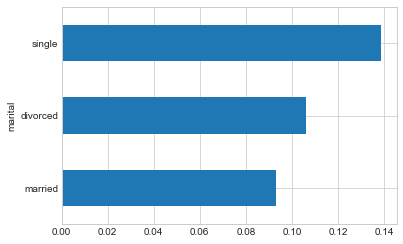

In [30]:
_ = train.groupby('marital')[TARGET_COL].mean().sort_values().plot(kind = 'barh')

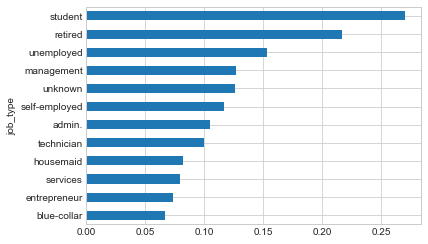

In [32]:
_=train.groupby('job_type')[TARGET_COL].mean().sort_values().plot(kind = 'barh')

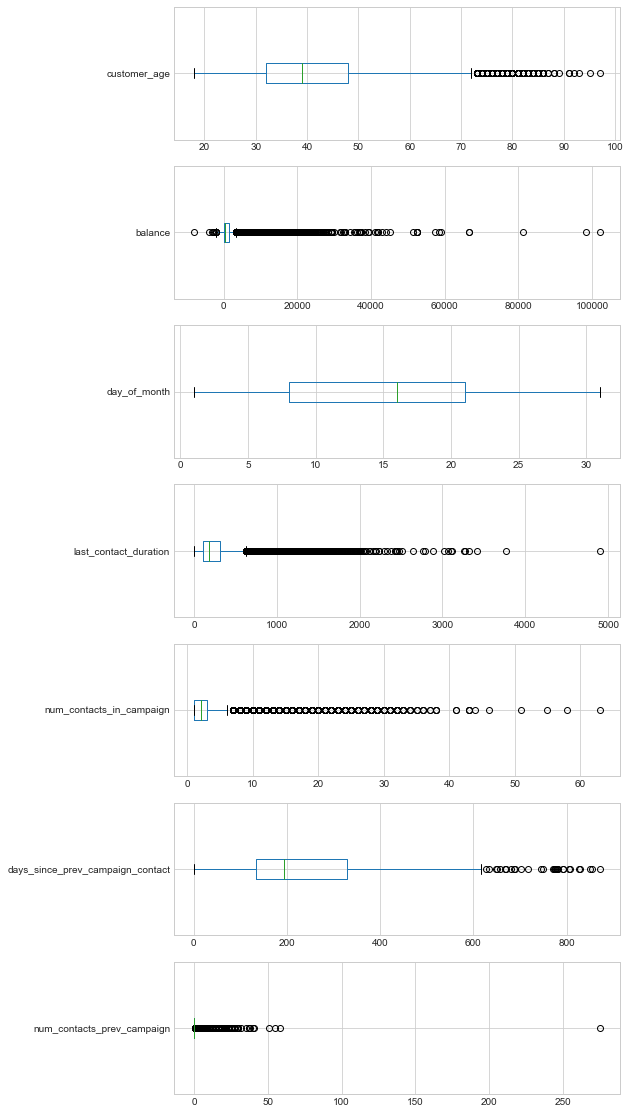

In [33]:
fig, axes = plt.subplots(7, 1, figsize=(8, 20))
for i, c in enumerate(num_cols):
  _ = train[[c]].boxplot(ax=axes[i], vert=False)

ValueError: could not convert string to float: 'id_43823'

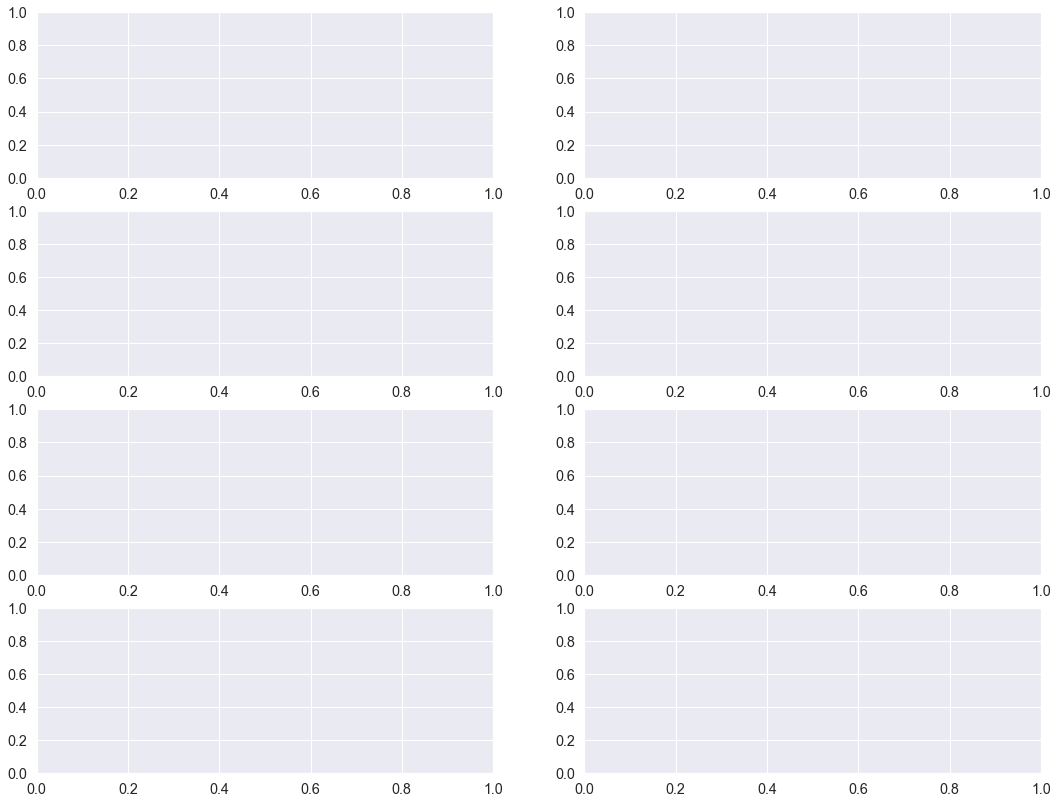

In [44]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(4, 2, figsize=(18,14))
axes = [ax for axes_row in axes for ax in axes_row]

for i,c in enumerate(num_cols):
    plot = sns.kdeplot(data = train, x=c, ax=axes[i],fill=True)

plt.tight_layout()

In [42]:
num_cols

['customer_age',
 'balance',
 'day_of_month',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'days_since_prev_campaign_contact',
 'num_contacts_prev_campaign']

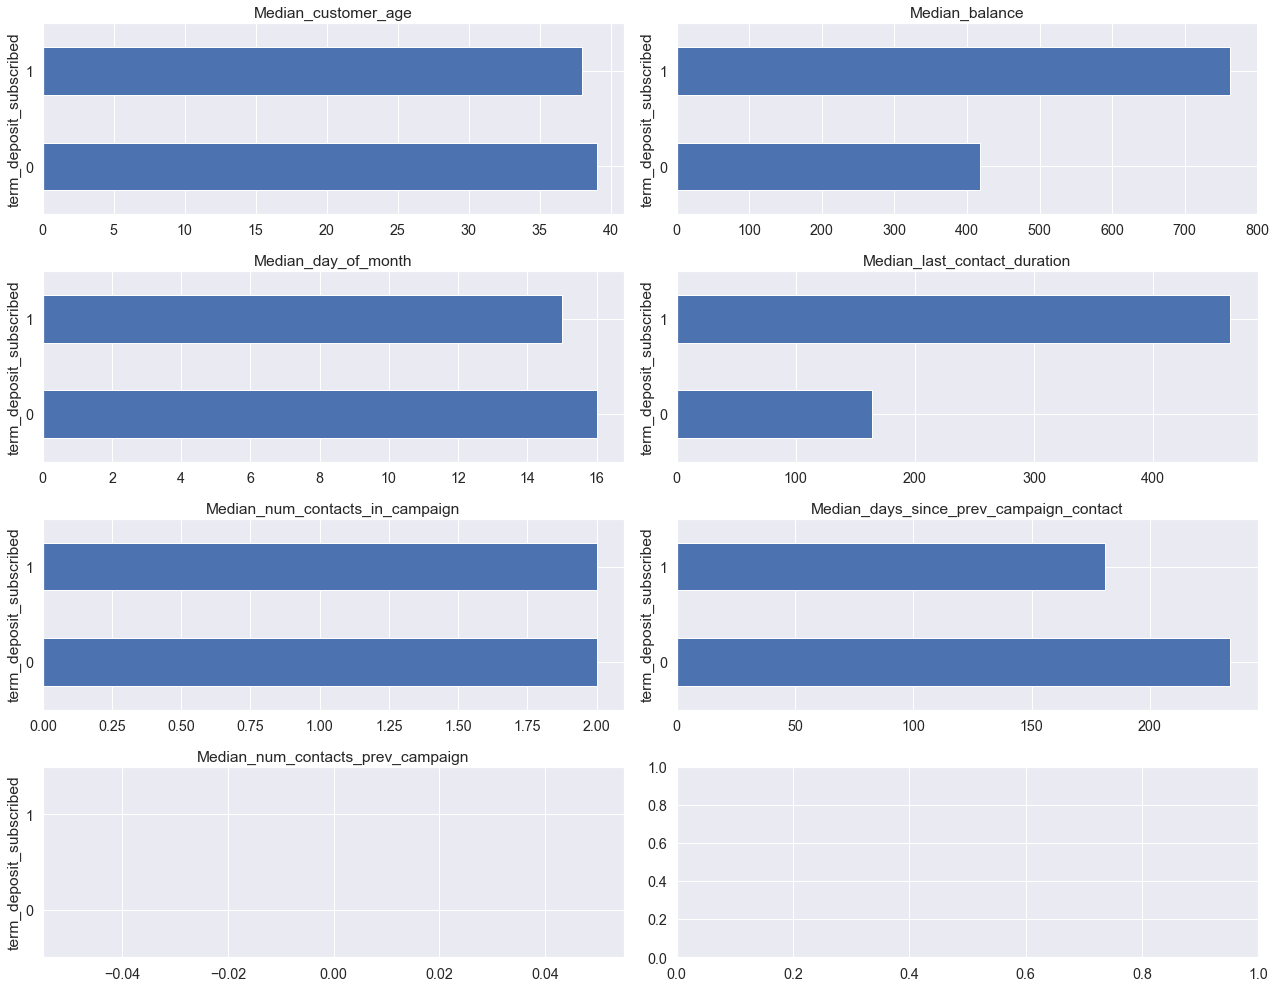

In [47]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(4, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = train.groupby(TARGET_COL)[c].median().plot(kind = 'barh', title=f'Median_{c}', ax=axes[i])
plt.tight_layout()

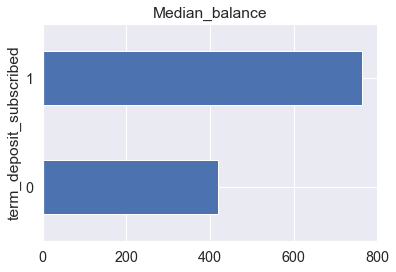

In [49]:
_ = train.groupby(TARGET_COL)['balance'].median().plot(kind = 'barh', title=f'Median_balance')

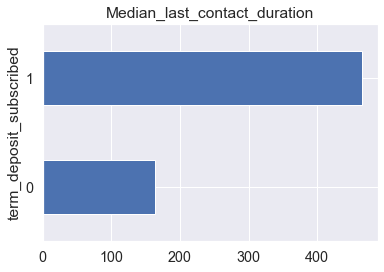

In [51]:
_=train.groupby(TARGET_COL)['last_contact_duration'].median().plot(kind='barh',title=f'Median_last_contact_duration')

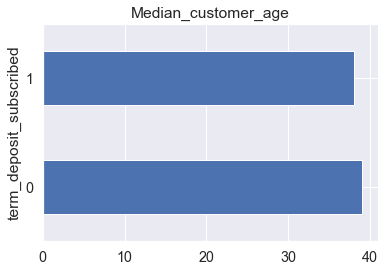

In [52]:
_=train.groupby(TARGET_COL)['customer_age'].median().plot(kind='barh',title=f'Median_customer_age')

In [54]:
train['is_old']=True
train.loc[train['customer_age'] <= 50, 'is_old'] = False

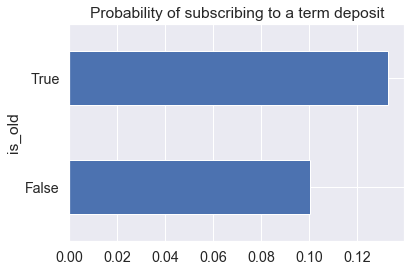

In [55]:
_ = train.groupby('is_old')[TARGET_COL].mean().sort_values().plot(kind = 'barh', title='Probability of subscribing to a term deposit')

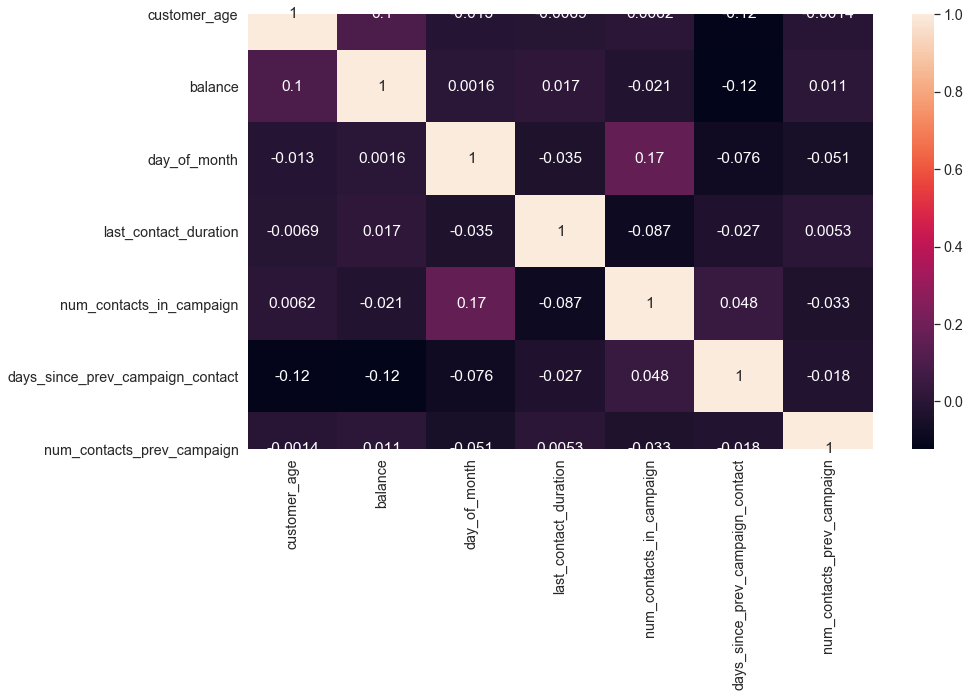

In [61]:
plt.figure(figsize=(14, 8))
_ = sns.heatmap(train[num_cols].corr(), annot=True)

In [ ]:
jo.